In [1]:
!pip install opencv-python

In [26]:
!pip install pydot

In [27]:
!pip install graphviz

In [1]:
import cv2
import numpy as np
from scipy import misc
I = misc.ascent()

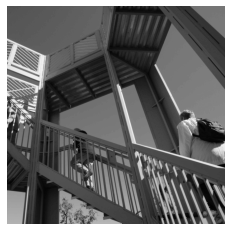

In [2]:
import matplotlib.pyplot as plt
plt.grid(False)
plt.gray()
plt.axis('off')
plt.imshow(I)
plt.show()

In [3]:
I_transformed = np.copy(I)
size_x = I_transformed.shape[0]
size_y = I_transformed.shape[1]

In [4]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, Input
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D, AveragePooling2D, GlobalAveragePooling2D 

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import models, layers
import tensorflow.keras as keras

In [6]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

In [7]:
from tensorflow.keras.models import Model 

In [8]:
from tensorflow.keras.layers import Dense, Flatten, Concatenate, Average, Dot
from tensorflow.keras.utils import plot_model 

In [9]:
from __future__ import print_function
#import tensorflow.keras as keras # расскоментируйте эту строку, чтобы начать обучение
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import os

In [10]:
import tensorflow as tf
print(tf.__version__)

2.7.0-dev20210702


In [11]:
x = tf.random.uniform([3, 3])

print("есть ли доступные GPU: "),
print(tf.config.experimental.list_physical_devices("GPU"))

print("тензор на GPU #0:  "),
print(x.device.endswith('GPU:0'))

есть ли доступные GPU: 
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
тензор на GPU #0:  
True


In [12]:
classes=['самолет', 'автомобиль', 'птица', 'кот', 'олень', 'собака', 'лягушка', 'лошадь', 'корабль', 'грузовик']

In [20]:
# установка параметров нейросети
batch_size = 32
num_classes = 10
epochs = 20
data_augmentation = False
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

# разделение тренировочной и тестовой выборки
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'тренировочные примеры')
print(x_test.shape[0], 'тестовые примеры')

# преобразование матрицы чисел 0-9 в бинарную матрицу чисел 0-1
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

x_train shape: (50000, 32, 32, 3)
50000 тренировочные примеры
10000 тестовые примеры


In [14]:
data_augmentation = False

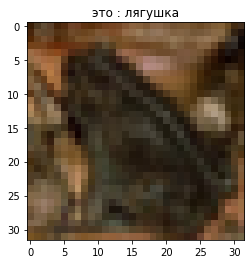

In [15]:
N = 30

plt.imshow(x_test[N][:,:,:])
plt.title('это : '+classes[np.argmax(y_test[N,:])])
plt.show()

In [26]:

# конфигурирование слоев нейросети
model = Sequential()

# слои нейросети отвественные за свертку и max-pooling
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout( 0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# полносвязные слои нейронной сети
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# инициализация RMSprop optimizer
#opt = tensorflow.keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)

# компиляция модели
model.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])



if not data_augmentation:
    print('Не используется data augmentation')
    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Использование data augmentation в реальном времени')
    # Препроцессинг и data augmentation в реальном времени:
    datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False, 
        zca_epsilon=1e-06, 
        rotation_range=0, 
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0., 
        zoom_range=0., 
        channel_shift_range=0.,
        fill_mode='nearest',
        cval=0.,
        horizontal_flip=True,
        vertical_flip=False,
        rescale=None,
        preprocessing_function=None,
        data_format=None,
        validation_split=0.0)

    # запуск data augmentation через fit
    #datagen.fit(x_train)

    # запуск data augmentation через fit_generator
    model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4)

# сохранение модели и весов
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('сохранить обученную модель как %s ' % model_path)

# проверка работы обученной модели
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Не используется data augmentation
Epoch 1/5
1563/1563 [==============================] - 20s 9ms/step - loss: 2.0788 - accuracy: 0.2293 - val_loss: 1.8147 - val_accuracy: 0.3564
Epoch 2/5
1563/1563 [==============================] - 14s 9ms/step - loss: 1.7523 - accuracy: 0.3641 - val_loss: 1.5845 - val_accuracy: 0.4301
Epoch 3/5
1563/1563 [==============================] - 14s 9ms/step - loss: 1.6071 - accuracy: 0.4152 - val_loss: 1.5031 - val_accuracy: 0.4611
Epoch 4/5
1563/1563 [==============================] - 14s 9ms/step - loss: 1.5084 - accuracy: 0.4522 - val_loss: 1.3931 - val_accuracy: 0.4986
Epoch 5/5
1563/1563 [==============================] - 15s 10ms/step - loss: 1.4147 - accuracy: 0.4879 - val_loss: 1.3271 - val_accuracy: 0.5276
сохранить обученную модель как d:\Git\GB-NN\Lesson_4\saved_models\keras_cifar10_trained_model.h5 
313/313 [==============================] - 1s 5ms/step - loss: 1.3271 - accuracy: 0.5276
Test loss: 1.3270951509475708
Test accuracy: 0.52759999036

In [39]:
datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False, 
        zca_epsilon=1e-06, 
        rotation_range=0, 
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0., 
        zoom_range=0., 
        channel_shift_range=0.,
        fill_mode='nearest',
        cval=0.,
        horizontal_flip=True,
        vertical_flip=False,
        rescale=None,
        preprocessing_function=None,
        data_format=None,
        validation_split=0.0)

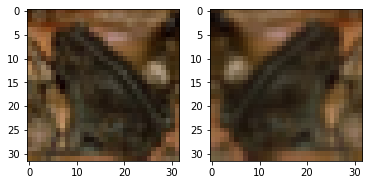

In [40]:
datagen.fit(x_test)
for imag,y  in datagen.flow(x_test[N:N+1,:,:,:],y_test[N:N+1], batch_size=1):
  plt.subplot(1,2,1)
  plt.imshow(x_test[N][:,:,:])
  plt.subplot(1,2,2)
  plt.imshow(imag[0,:,:,:])

  plt.show()
  if True:
    break

In [30]:
 model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test))

C:\Users\Arhio\anaconda3\lib\site-packages\keras\engine\training.py:1977: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
1563/1563 [==============================] - 24s 15ms/step - loss: 1.4409 - accuracy: 0.4755 - val_loss: 1.2436 - val_accuracy: 0.5518
Epoch 2/5
1563/1563 [==============================] - 25s 16ms/step - loss: 1.3928 - accuracy: 0.4957 - val_loss: 1.2015 - val_accuracy: 0.5740
Epoch 3/5
1563/1563 [==============================] - 24s 15ms/step - loss: 1.3421 - accuracy: 0.5158 - val_loss: 1.1826 - val_accuracy: 0.5795
Epoch 4/5
1563/1563 [==============================] - 25s 16ms/step - loss: 1.3039 - accuracy: 0.5329 - val_loss: 1.2524 - val_accuracy: 0.5520
Epoch 5/5
1563/1563 [==============================] - 25s 16ms/step - loss: 1.2671 - accuracy: 0.5453 - val_loss: 1.0805 - val_accuracy: 0.6171


In [31]:
 model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test))

Epoch 1/5
1563/1563 [==============================] - 23s 14ms/step - loss: 1.2276 - accuracy: 0.5615 - val_loss: 1.1319 - val_accuracy: 0.5992
Epoch 2/5
1563/1563 [==============================] - 24s 16ms/step - loss: 1.1914 - accuracy: 0.5741 - val_loss: 1.0169 - val_accuracy: 0.6427
Epoch 3/5
1563/1563 [==============================] - 25s 16ms/step - loss: 1.1599 - accuracy: 0.5872 - val_loss: 0.9777 - val_accuracy: 0.6604
Epoch 4/5
1563/1563 [==============================] - 24s 16ms/step - loss: 1.1313 - accuracy: 0.5975 - val_loss: 0.9854 - val_accuracy: 0.6558
Epoch 5/5
1563/1563 [==============================] - 24s 16ms/step - loss: 1.1083 - accuracy: 0.6072 - val_loss: 0.9584 - val_accuracy: 0.6626


In [17]:
# конфигурирование слоев нейросети
model2 = Sequential()

# слои нейросети отвественные за свертку и max-pooling
model2.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model2.add(Activation('relu'))
model2.add(Conv2D(32, (3, 3)))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout( 0.25))

model2.add(Conv2D(64, (3, 3), padding='same'))
model2.add(Activation('relu'))
model2.add(Conv2D(64, (3, 3)))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))


# полносвязные слои нейронной сети
model2.add(Flatten())
model2.add(Dense(512))
model2.add(Activation('relu'))
model2.add(Dropout(0.5))
model2.add(Dense(256))
model2.add(Activation('relu'))
model2.add(Dense(256))
model2.add(Activation('relu'))
model2.add(Dense(num_classes))
model2.add(Activation('softmax'))

# инициализация RMSprop optimizer
#opt = tensorflow.keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)

# компиляция модели
model2.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])



if not data_augmentation:
    print('Не используется data augmentation')
    model2.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Использование data augmentation в реальном времени')
    # Препроцессинг и data augmentation в реальном времени:
    datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False, 
        zca_epsilon=1e-06, 
        rotation_range=0, 
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0., 
        zoom_range=0., 
        channel_shift_range=0.,
        fill_mode='nearest',
        cval=0.,
        horizontal_flip=True,
        vertical_flip=False,
        rescale=None,
        preprocessing_function=None,
        data_format=None,
        validation_split=0.0)

    # запуск data augmentation через fit
    #datagen.fit(x_train)

    # запуск data augmentation через fit_generator
    model2.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4)

# сохранение модели и весов
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model2.save(model_path)
print('сохранить обученную модель как %s ' % model_path)

# проверка работы обученной модели
scores = model2.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Не используется data augmentation
Epoch 1/10
1563/1563 [==============================] - 16s 10ms/step - loss: 2.1428 - accuracy: 0.1906 - val_loss: 1.9207 - val_accuracy: 0.2864
Epoch 2/10
1563/1563 [==============================] - 15s 10ms/step - loss: 1.8655 - accuracy: 0.3143 - val_loss: 1.6549 - val_accuracy: 0.3928
Epoch 3/10
1563/1563 [==============================] - 15s 10ms/step - loss: 1.6917 - accuracy: 0.3820 - val_loss: 1.7216 - val_accuracy: 0.3863
Epoch 4/10
1563/1563 [==============================] - 15s 10ms/step - loss: 1.5787 - accuracy: 0.4194 - val_loss: 1.4589 - val_accuracy: 0.4696
Epoch 5/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.4766 - accuracy: 0.4574 - val_loss: 1.3976 - val_accuracy: 0.4948
Epoch 6/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.3950 - accuracy: 0.4912 - val_loss: 1.2842 - val_accuracy: 0.5311
Epoch 7/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.3251 - acc

In [21]:
first_input = Input(shape=(32,32,3,))
x11 = Conv2D(10, (3, 3), activation='relu', padding='same')(first_input)
x11 = Conv2D(10, (3, 3), activation='relu')(x11)
x11 = MaxPooling2D(pool_size=(2, 2))(x11)
x11 = Dropout(0.25)(x11)

x11 = Conv2D(10, (3, 3), activation='relu', padding='same')(x11)
x11 = Conv2D(10, (3, 3), activation='relu')(x11)
x11 = MaxPooling2D(pool_size=(2, 2))(x11)
x11 = Dropout(0.25)(x11)

x11 = Flatten()(x11)
x11 = Dense(512, activation='relu')(x11)
first_dense = keras.models.Model(inputs=first_input,outputs=x11)


#second_input = Input(shape=(32,32,3, ))
x22 = Conv2D(10, (3, 3), activation='relu', padding='same')(first_input)
x22 = Conv2D(10, (3, 3), activation='relu')(x22)
x22 = MaxPooling2D(pool_size=(2, 2))(x22)
x22 = Dropout(0.25)(x22)

x22 = Flatten()(x22)
x22 = Dense(512, activation='relu')(x22)
second_dense = keras.models.Model(inputs=first_input, outputs=x22)


merge_one = Concatenate()([first_dense.output, second_dense.output])

merge_two=Dense(10, activation='softmax')(merge_one)

model2 = Model(inputs=first_input, outputs=merge_two)
model2.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

In [22]:
x = tf.random.uniform([3, 3])

print("есть ли доступные GPU: "),
print(tf.config.experimental.list_physical_devices("GPU"))

print("тензор на GPU #0:  "),
print(x.device.endswith('GPU:0'))

есть ли доступные GPU: 
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
тензор на GPU #0:  
True


In [23]:
plot_model(model2,'model2.png')

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [24]:
if not data_augmentation:
    print('Не используется data augmentation')
    model2.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Использование data augmentation в реальном времени')
    # Препроцессинг и data augmentation в реальном времени:
    datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False, 
        zca_epsilon=1e-06, 
        rotation_range=0, 
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0., 
        zoom_range=0., 
        channel_shift_range=0.,
        fill_mode='nearest',
        cval=0.,
        horizontal_flip=True,
        vertical_flip=False,
        rescale=None,
        preprocessing_function=None,
        data_format=None,
        validation_split=0.0)

    # запуск data augmentation через fit
    #datagen.fit(x_train)

    # запуск data augmentation через fit_generator
    model2.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4)

# сохранение модели и весов
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model2.save(model_path)
print('сохранить обученную модель как %s ' % model_path)

# проверка работы обученной модели
scores = model2.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Не используется data augmentation
Epoch 1/10
1563/1563 [==============================] - 18s 9ms/step - loss: 1.9943 - accuracy: 0.2746 - val_loss: 1.7733 - val_accuracy: 0.3857
Epoch 2/10
1563/1563 [==============================] - 14s 9ms/step - loss: 1.6630 - accuracy: 0.4090 - val_loss: 1.4890 - val_accuracy: 0.4671
Epoch 3/10
1563/1563 [==============================] - 14s 9ms/step - loss: 1.4609 - accuracy: 0.4806 - val_loss: 1.3994 - val_accuracy: 0.5063
Epoch 4/10
1563/1563 [==============================] - 14s 9ms/step - loss: 1.3526 - accuracy: 0.5206 - val_loss: 1.3031 - val_accuracy: 0.5321
Epoch 5/10
1563/1563 [==============================] - 14s 9ms/step - loss: 1.2819 - accuracy: 0.5441 - val_loss: 1.2500 - val_accuracy: 0.5638
Epoch 6/10
1563/1563 [==============================] - 14s 9ms/step - loss: 1.2257 - accuracy: 0.5667 - val_loss: 1.1932 - val_accuracy: 0.5816
Epoch 7/10
1563/1563 [==============================] - 15s 10ms/step - loss: 1.1770 - accuracy:

In [26]:
first_input = Input(shape=(32,32,3,))
x11 = Conv2D(10, (3, 3), activation='relu', padding='same')(first_input)
x11 = Conv2D(10, (3, 3), activation='relu')(x11)
x11 = MaxPooling2D(pool_size=(2, 2))(x11)
x11 = Dropout(0.25)(x11)

x11 = Conv2D(10, (3, 3), activation='relu', padding='same')(x11)
x11 = Conv2D(10, (3, 3), activation='relu')(x11)
x11 = MaxPooling2D(pool_size=(2, 2))(x11)
x11 = Dropout(0.25)(x11)

x11 = Flatten()(x11)
x11 = Dense(512, activation='relu')(x11)
first_dense = keras.models.Model(inputs=first_input,outputs=x11)


#second_input = Input(shape=(32,32,3, ))
x22 = Conv2D(10, (3, 3), activation='relu', padding='same')(first_input)
x22 = Conv2D(10, (3, 3), activation='relu')(x22)
x22 = MaxPooling2D(pool_size=(2, 2))(x22)
x22 = Dropout(0.25)(x22)

x22 = Flatten()(x22)
x22 = Dense(512, activation='relu')(x22)
second_dense = keras.models.Model(inputs=first_input, outputs=x22)


merge_one = Concatenate()([first_dense.output, second_dense.output])

merge_one = Dense(256, activation='relu')(merge_one)
merge_one = Dense(128, activation='relu')(merge_one)
merge_two = Dense(10, activation='softmax')(merge_one)

model3 = Model(inputs=first_input, outputs=merge_two)
model3.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

In [27]:
plot_model(model3,'model3.png')

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [28]:
if not data_augmentation:
    print('Не используется data augmentation')
    model3.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Использование data augmentation в реальном времени')
    # Препроцессинг и data augmentation в реальном времени:
    datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False, 
        zca_epsilon=1e-06, 
        rotation_range=0, 
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0., 
        zoom_range=0., 
        channel_shift_range=0.,
        fill_mode='nearest',
        cval=0.,
        horizontal_flip=True,
        vertical_flip=False,
        rescale=None,
        preprocessing_function=None,
        data_format=None,
        validation_split=0.0)

    # запуск data augmentation через fit
    #datagen.fit(x_train)

    # запуск data augmentation через fit_generator
    model3.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4)

# сохранение модели и весов
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model3.save(model_path)
print('сохранить обученную модель как %s ' % model_path)

# проверка работы обученной модели
scores = model3.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Не используется data augmentation
Epoch 1/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.9992 - accuracy: 0.2692 - val_loss: 1.7942 - val_accuracy: 0.3574
Epoch 2/10
1563/1563 [==============================] - 15s 10ms/step - loss: 1.6727 - accuracy: 0.3977 - val_loss: 1.6510 - val_accuracy: 0.4121
Epoch 3/10
1563/1563 [==============================] - 15s 10ms/step - loss: 1.5152 - accuracy: 0.4523 - val_loss: 1.4502 - val_accuracy: 0.4796
Epoch 4/10
1563/1563 [==============================] - 15s 9ms/step - loss: 1.4020 - accuracy: 0.4967 - val_loss: 1.3516 - val_accuracy: 0.5036
Epoch 5/10
1563/1563 [==============================] - 15s 10ms/step - loss: 1.3157 - accuracy: 0.5285 - val_loss: 1.3214 - val_accuracy: 0.5299
Epoch 6/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.2426 - accuracy: 0.5567 - val_loss: 1.1878 - val_accuracy: 0.5769
Epoch 7/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.1785 - accu

In [16]:
first_input = Input(shape=(32,32,3,))
x11 = Conv2D(10, (3, 3), activation='relu', padding='same')(first_input)
x11 = Conv2D(10, (3, 3), activation='relu')(x11)
x11 = MaxPooling2D(pool_size=(2, 2))(x11)
x11 = Dropout(0.25)(x11)

x11 = Conv2D(10, (3, 3), activation='relu', padding='same')(x11)
x11 = Conv2D(10, (3, 3), activation='relu')(x11)
x11 = MaxPooling2D(pool_size=(2, 2))(x11)
x11 = Dropout(0.25)(x11)

x11 = Flatten()(x11)
x11 = Dense(512, activation='relu')(x11)
first_dense = keras.models.Model(inputs=first_input,outputs=x11)


#second_input = Input(shape=(32,32,3, ))
x22 = Conv2D(10, (3, 3), activation='relu', padding='same')(first_input)
x22 = Conv2D(10, (3, 3), activation='relu')(x22)
x22 = MaxPooling2D(pool_size=(2, 2))(x22)
x22 = Dropout(0.25)(x22)

x22 = Flatten()(x22)
x22 = Dense(512, activation='relu')(x22)
second_dense = keras.models.Model(inputs=first_input, outputs=x22)


x33 = Conv2D(10, (3, 3), activation='relu', padding='same')(first_input)
x33 = Flatten()(x33)
x33 = Dense(512, activation='tanh')(x33)
x33 = Dense(256, activation='tanh')(x33)
x33 = Dense(256, activation='relu')(x33)
x33 = Dense(128, activation='relu')(x33)
three_dense = keras.models.Model(inputs=first_input, outputs=x33)


input_ = Concatenate()([first_dense.output, second_dense.output])
merge_one = Dense(256, activation='relu')(input_)
merge_one = Dense(128, activation='relu')(merge_one)
fore_dense = keras.models.Model(inputs=first_input, outputs=merge_one)

merge_two = Concatenate()([three_dense.output, fore_dense.output])
merge_two = Dense(128, activation='relu')(merge_two)
merge_two = Dense(128, activation='relu')(merge_two)
merge_two = Dense(64, activation='relu')(merge_two)

merge_three = Dense(10, activation='softmax')(merge_two)


model4 = Model(inputs=first_input, outputs=merge_three)
model4.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

In [17]:
model4.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 32, 32, 10)   280         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 30, 30, 10)   910         conv2d[0][0]                     
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 15, 15, 10)   0           conv2d_1[0][0]                   
____________________________________________________________________________________________

In [18]:
plot_model(model4,'model4.png')

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [19]:
if not data_augmentation:
    print('Не используется data augmentation')
    model4.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Использование data augmentation в реальном времени')
    # Препроцессинг и data augmentation в реальном времени:
    datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False, 
        zca_epsilon=1e-06, 
        rotation_range=0, 
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0., 
        zoom_range=0., 
        channel_shift_range=0.,
        fill_mode='nearest',
        cval=0.,
        horizontal_flip=True,
        vertical_flip=False,
        rescale=None,
        preprocessing_function=None,
        data_format=None,
        validation_split=0.0)

    # запуск data augmentation через fit
    #datagen.fit(x_train)

    # запуск data augmentation через fit_generator
    model4.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4)

# сохранение модели и весов
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model4.save(model_path)
print('сохранить обученную модель как %s ' % model_path)

# проверка работы обученной модели
scores = model4.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Не используется data augmentation
Epoch 1/10
1563/1563 [==============================] - 23s 13ms/step - loss: 1.9296 - accuracy: 0.2993 - val_loss: 1.7667 - val_accuracy: 0.3580
Epoch 2/10
1563/1563 [==============================] - 21s 13ms/step - loss: 1.5821 - accuracy: 0.4297 - val_loss: 1.5626 - val_accuracy: 0.4311
Epoch 3/10
1563/1563 [==============================] - 22s 14ms/step - loss: 1.3894 - accuracy: 0.4970 - val_loss: 1.3561 - val_accuracy: 0.5063
Epoch 4/10
1563/1563 [==============================] - 21s 14ms/step - loss: 1.2593 - accuracy: 0.5454 - val_loss: 1.2742 - val_accuracy: 0.5380
Epoch 5/10
1563/1563 [==============================] - 22s 14ms/step - loss: 1.1629 - accuracy: 0.5823 - val_loss: 1.2570 - val_accuracy: 0.5448
Epoch 6/10
1563/1563 [==============================] - 22s 14ms/step - loss: 1.0825 - accuracy: 0.6107 - val_loss: 1.1772 - val_accuracy: 0.5824
Epoch 7/10
1563/1563 [==============================] - 22s 14ms/step - loss: 1.0080 - acc

In [17]:
first_input = Input(shape=(32,32,3,))
x11 = Conv2D(10, (3, 3), activation='relu', padding='same')(first_input)
x11 = Conv2D(10, (3, 3), activation='relu')(x11)
x11 = MaxPooling2D(pool_size=(2, 2))(x11)
x11 = Dropout(0.25)(x11)

x11 = Conv2D(10, (3, 3), activation='relu', padding='same')(x11)
x11 = Conv2D(10, (3, 3), activation='relu')(x11)
x11 = MaxPooling2D(pool_size=(2, 2))(x11)
x11 = Dropout(0.25)(x11)

x11 = Flatten()(x11)
x11 = Dense(512, activation='relu')(x11)
first_dense = keras.models.Model(inputs=first_input,outputs=x11)


#second_input = Input(shape=(32,32,3, ))
x22 = Conv2D(10, (3, 3), activation='relu', padding='same')(first_input)
x22 = Conv2D(10, (3, 3), activation='relu')(x22)
x22 = MaxPooling2D(pool_size=(2, 2))(x22)
x22 = Dropout(0.25)(x22)

x22 = Flatten()(x22)
x22 = Dense(512, activation='relu')(x22)
second_dense = keras.models.Model(inputs=first_input, outputs=x22)


input_ = Concatenate()([first_dense.output, second_dense.output])
merge_one = Dense(256, activation='relu')(input_)
merge_one = Dense(128, activation='relu')(merge_one)

merge_three = Dense(10, activation='softmax')(merge_one)


model5 = Model(inputs=first_input, outputs=merge_three)
model5.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

In [18]:
model5.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 32, 32, 10)   280         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 30, 30, 10)   910         conv2d[0][0]                     
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 15, 15, 10)   0           conv2d_1[0][0]                   
____________________________________________________________________________________________

In [19]:
plot_model(model5,'model5.png')

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [20]:
if not data_augmentation:
    print('Не используется data augmentation')
    model5.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Использование data augmentation в реальном времени')
    # Препроцессинг и data augmentation в реальном времени:
    datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False, 
        zca_epsilon=1e-06, 
        rotation_range=0, 
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0., 
        zoom_range=0., 
        channel_shift_range=0.,
        fill_mode='nearest',
        cval=0.,
        horizontal_flip=True,
        vertical_flip=False,
        rescale=None,
        preprocessing_function=None,
        data_format=None,
        validation_split=0.0)

    # запуск data augmentation через fit
    #datagen.fit(x_train)

    # запуск data augmentation через fit_generator
    model5.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4)

# сохранение модели и весов
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model5.save(model_path)
print('сохранить обученную модель как %s ' % model_path)

# проверка работы обученной модели
scores = model5.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Не используется data augmentation
Epoch 1/10
1563/1563 [==============================] - 20s 10ms/step - loss: 2.0214 - accuracy: 0.2668 - val_loss: 1.7884 - val_accuracy: 0.3629
Epoch 2/10
1563/1563 [==============================] - 15s 9ms/step - loss: 1.6856 - accuracy: 0.4021 - val_loss: 1.6711 - val_accuracy: 0.3995
Epoch 3/10
1563/1563 [==============================] - 15s 9ms/step - loss: 1.4740 - accuracy: 0.4707 - val_loss: 1.3593 - val_accuracy: 0.5078
Epoch 4/10
1563/1563 [==============================] - 15s 9ms/step - loss: 1.3470 - accuracy: 0.5192 - val_loss: 1.2996 - val_accuracy: 0.5330
Epoch 5/10
1563/1563 [==============================] - 15s 9ms/step - loss: 1.2663 - accuracy: 0.5488 - val_loss: 1.1945 - val_accuracy: 0.5757
Epoch 6/10
1563/1563 [==============================] - 15s 10ms/step - loss: 1.1998 - accuracy: 0.5738 - val_loss: 1.1549 - val_accuracy: 0.5869
Epoch 7/10
1563/1563 [==============================] - 15s 10ms/step - loss: 1.1427 - accurac

In [22]:
first_input = Input(shape=(32,32,3,))
x11 = Conv2D(10, (3, 3), activation='relu', padding='same')(first_input)
x11 = Conv2D(10, (3, 3), activation='relu')(x11)
x11 = MaxPooling2D(pool_size=(2, 2))(x11)
x11 = Dropout(0.25)(x11)

x11 = Conv2D(10, (3, 3), activation='relu', padding='same')(x11)
x11 = Conv2D(10, (3, 3), activation='relu')(x11)
x11 = MaxPooling2D(pool_size=(2, 2))(x11)
x11 = Dropout(0.25)(x11)

x11 = Flatten()(x11)
x11 = Dense(512, activation='relu')(x11)
first_dense = keras.models.Model(inputs=first_input,outputs=x11)


#second_input = Input(shape=(32,32,3, ))
x22 = Conv2D(10, (3, 3), activation='relu', padding='same')(first_input)
x22 = Conv2D(10, (3, 3), activation='relu')(x22)
x22 = MaxPooling2D(pool_size=(2, 2))(x22)
x22 = Dropout(0.25)(x22)

x22 = Flatten()(x22)
x22 = Dense(512, activation='relu')(x22)
second_dense = keras.models.Model(inputs=first_input, outputs=x22)

#second_input = Input(shape=(32,32,3, ))
x33 = Conv2D(10, (3, 3), activation='relu', padding='same')(first_input)
x33 = Conv2D(10, (3, 3), activation='relu')(x33)
x33 = MaxPooling2D(pool_size=(2, 2))(x33)
x33 = Dropout(0.25)(x33)

x33 = Flatten()(x33)
x33 = Dense(900, activation='relu')(x33)
x33 = Dense(800, activation='tanh')(x33)
x33 = Dense(700, activation='tanh')(x33)
x33 = Dense(600, activation='relu')(x33)
x33 = Dense(512, activation='relu')(x33)
three_dense = keras.models.Model(inputs=first_input, outputs=x33)


input_ = Concatenate()([first_dense.output, second_dense.output, three_dense.output])
merge_one = Dense(256, activation='relu')(input_)
merge_one = Dense(128, activation='relu')(merge_one)

merge_three = Dense(10, activation='softmax')(merge_one)


model5 = Model(inputs=first_input, outputs=merge_three)
model5.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

In [23]:
model5.summary()

Model: "model_9"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_14 (Conv2D)              (None, 32, 32, 10)   280         input_3[0][0]                    
__________________________________________________________________________________________________
conv2d_20 (Conv2D)              (None, 32, 32, 10)   280         input_3[0][0]                    
__________________________________________________________________________________________________
conv2d_15 (Conv2D)              (None, 30, 30, 10)   910         conv2d_14[0][0]                  
____________________________________________________________________________________________

In [24]:
plot_model(model5,'model5.png')

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [25]:
if not data_augmentation:
    print('Не используется data augmentation')
    model5.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Использование data augmentation в реальном времени')
    # Препроцессинг и data augmentation в реальном времени:
    datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False, 
        zca_epsilon=1e-06, 
        rotation_range=0, 
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0., 
        zoom_range=0., 
        channel_shift_range=0.,
        fill_mode='nearest',
        cval=0.,
        horizontal_flip=True,
        vertical_flip=False,
        rescale=None,
        preprocessing_function=None,
        data_format=None,
        validation_split=0.0)

    # запуск data augmentation через fit
    #datagen.fit(x_train)

    # запуск data augmentation через fit_generator
    model5.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4)

# сохранение модели и весов
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model5.save(model_path)
print('сохранить обученную модель как %s ' % model_path)

# проверка работы обученной модели
scores = model5.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Не используется data augmentation
Epoch 1/10
1563/1563 [==============================] - 22s 14ms/step - loss: 1.9853 - accuracy: 0.2728 - val_loss: 1.8380 - val_accuracy: 0.3505
Epoch 2/10
1563/1563 [==============================] - 21s 14ms/step - loss: 1.6245 - accuracy: 0.4141 - val_loss: 1.5842 - val_accuracy: 0.4430
Epoch 3/10
1563/1563 [==============================] - 21s 14ms/step - loss: 1.4176 - accuracy: 0.4852 - val_loss: 1.3568 - val_accuracy: 0.5086
Epoch 4/10
1563/1563 [==============================] - 21s 14ms/step - loss: 1.2923 - accuracy: 0.5331 - val_loss: 1.2605 - val_accuracy: 0.5491
Epoch 5/10
1563/1563 [==============================] - 22s 14ms/step - loss: 1.2001 - accuracy: 0.5699 - val_loss: 1.2262 - val_accuracy: 0.5685
Epoch 6/10
1563/1563 [==============================] - 22s 14ms/step - loss: 1.1174 - accuracy: 0.6007 - val_loss: 1.1767 - val_accuracy: 0.5826
Epoch 7/10
1563/1563 [==============================] - 22s 14ms/step - loss: 1.0496 - acc

In [34]:
first_input = Input(shape=(32,32,3,))
x11 = Conv2D(10, (3, 3), activation='relu', padding='same')(first_input)
x11 = Conv2D(10, (3, 3), activation='relu')(x11)
x11 = MaxPooling2D(pool_size=(2, 2))(x11)
x11 = Dropout(0.25)(x11)

x11 = Conv2D(10, (3, 3), activation='relu', padding='same')(x11)
x11 = Conv2D(10, (3, 3), activation='relu')(x11)
x11 = MaxPooling2D(pool_size=(2, 2))(x11)
x11 = Dropout(0.25)(x11)

x11 = Flatten()(x11)
x11 = Dense(512, activation='relu')(x11)
x11 = Dense(256, activation='relu')(x11)
first_dense = keras.models.Model(inputs=first_input,outputs=x11)


#second_input = Input(shape=(32,32,3, ))
x22 = Conv2D(10, (3, 3), activation='relu', padding='same')(first_input)
x22 = Conv2D(10, (3, 3), activation='relu')(x22)
x22 = MaxPooling2D(pool_size=(2, 2))(x22)
x22 = Dropout(0.25)(x22)

x22 = Flatten()(x22)
x22 = Dense(512, activation='relu')(x22)
x22 = Dense(256, activation='relu')(x22)
second_dense = keras.models.Model(inputs=first_input, outputs=x22)

#second_input = Input(shape=(32,32,3, ))
x33 = Conv2D(10, (3, 3), activation='relu', padding='same')(first_input)
x33 = Conv2D(10, (3, 3), activation='relu')(x33)
x33 = MaxPooling2D(pool_size=(2, 2))(x33)
x33 = Dropout(0.25)(x33)

x33 = Flatten()(x33)
x33 = Dense(900, activation='relu')(x33)
x33 = Dense(800, activation='tanh')(x33)
x33 = Dense(700, activation='tanh')(x33)
x33 = Dense(600, activation='relu')(x33)
x33 = Dense(512, activation='relu')(x33)
x33 = Dense(256, activation='relu')(x33)
three_dense = keras.models.Model(inputs=first_input, outputs=x33)


input_ = Concatenate()([first_dense.output, second_dense.output, three_dense.output])
merge_one = Dense(256, activation='relu')(input_)
merge_one = Dense(128, activation='relu')(merge_one)

merge_three = Dense(10, activation='softmax')(merge_one)


model6 = Model(inputs=first_input, outputs=merge_three)
model6.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

In [35]:
model6.summary()

Model: "model_21"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_38 (Conv2D)              (None, 32, 32, 10)   280         input_6[0][0]                    
__________________________________________________________________________________________________
conv2d_44 (Conv2D)              (None, 32, 32, 10)   280         input_6[0][0]                    
__________________________________________________________________________________________________
conv2d_39 (Conv2D)              (None, 30, 30, 10)   910         conv2d_38[0][0]                  
___________________________________________________________________________________________

In [36]:
plot_model(model6,'model6.png')

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [37]:
if not data_augmentation:
    print('Не используется data augmentation')
    model6.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Использование data augmentation в реальном времени')
    # Препроцессинг и data augmentation в реальном времени:
    datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False, 
        zca_epsilon=1e-06, 
        rotation_range=0, 
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0., 
        zoom_range=0., 
        channel_shift_range=0.,
        fill_mode='nearest',
        cval=0.,
        horizontal_flip=True,
        vertical_flip=False,
        rescale=None,
        preprocessing_function=None,
        data_format=None,
        validation_split=0.0)

    # запуск data augmentation через fit
    #datagen.fit(x_train)

    # запуск data augmentation через fit_generator
    model6.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4)

# сохранение модели и весов
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model6.save(model_path)
print('сохранить обученную модель как %s ' % model_path)

# проверка работы обученной модели
scores = model6.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Не используется data augmentation
Epoch 1/10
1563/1563 [==============================] - 23s 15ms/step - loss: 2.0395 - accuracy: 0.2514 - val_loss: 1.7715 - val_accuracy: 0.3676
Epoch 2/10
1563/1563 [==============================] - 23s 15ms/step - loss: 1.6735 - accuracy: 0.3961 - val_loss: 1.5617 - val_accuracy: 0.4270
Epoch 3/10
1563/1563 [==============================] - 24s 15ms/step - loss: 1.4919 - accuracy: 0.4585 - val_loss: 1.3891 - val_accuracy: 0.4893
Epoch 4/10
1563/1563 [==============================] - 24s 15ms/step - loss: 1.3733 - accuracy: 0.5036 - val_loss: 1.4113 - val_accuracy: 0.4798
Epoch 5/10
1563/1563 [==============================] - 24s 15ms/step - loss: 1.2900 - accuracy: 0.5343 - val_loss: 1.2357 - val_accuracy: 0.5519
Epoch 6/10
1563/1563 [==============================] - 24s 15ms/step - loss: 1.2180 - accuracy: 0.5627 - val_loss: 1.7359 - val_accuracy: 0.4304
Epoch 7/10
1563/1563 [==============================] - 24s 15ms/step - loss: 1.1549 - acc

In [34]:
first_input = Input(shape=(32,32,3,))
x11 = Conv2D(10, (3, 3), activation='relu', padding='same')(first_input)
x11 = Conv2D(10, (3, 3), activation='relu')(x11)
x11 = MaxPooling2D(pool_size=(2, 2))(x11)
x11 = Dropout(0.25)(x11)

x11 = Conv2D(10, (3, 3), activation='relu', padding='same')(x11)
x11 = Conv2D(10, (3, 3), activation='relu')(x11)
x11 = MaxPooling2D(pool_size=(2, 2))(x11)
x11 = Dropout(0.25)(x11)

x11 = Flatten()(x11)
x11 = Dense(512, activation='relu')(x11)
first_dense = keras.models.Model(inputs=first_input,outputs=x11)


#second_input = Input(shape=(32,32,3, ))
x22 = Conv2D(10, (3, 3), activation='relu', padding='same')(first_input)
x22 = Conv2D(10, (3, 3), activation='relu')(x22)
x22 = MaxPooling2D(pool_size=(2, 2))(x22)
x22 = Dropout(0.25)(x22)

x22 = Flatten()(x22)
x22 = Dense(512, activation='relu')(x22)
second_dense = keras.models.Model(inputs=first_input, outputs=x22)

#second_input = Input(shape=(32,32,3, ))
x33 = Conv2D(10, (3, 3), activation='relu', padding='same')(first_input)
x33 = Conv2D(10, (3, 3), activation='relu')(x33)
x33 = MaxPooling2D(pool_size=(2, 2))(x33)
x33 = Dropout(0.25)(x33)

x33 = Flatten()(x33)
x33 = Dense(900, activation='relu')(x33)
x33 = Dense(800, activation='tanh')(x33)
x33 = Dense(700, activation='tanh')(x33)
x33 = Dense(600, activation='relu')(x33)
x33 = Dense(512, activation='relu')(x33)
three_dense = keras.models.Model(inputs=first_input, outputs=x33)


x44 = Conv2D(10, (3, 3), activation='tanh', padding='same')(first_input)
x44 = Conv2D(10, (3, 3), activation='tanh')(x44)
x44 = MaxPooling2D(pool_size=(2, 2))(x44)
x44 = Dropout(0.25)(x44)

x44 = Conv2D(10, (3, 3), activation='relu', padding='same')(x44)
x44 = Conv2D(10, (3, 3), activation='relu')(x44)
x44 = MaxPooling2D(pool_size=(2, 2))(x44)
x44 = Dropout(0.25)(x44)

x44 = Conv2D(10, (3, 3), activation='relu', padding='same')(x44)
x44 = Conv2D(10, (3, 3), activation='relu')(x44)
x44 = MaxPooling2D(pool_size=(2, 2))(x44)
x44 = Dropout(0.25)(x44)

x44 = Flatten()(x44)
x44 = Dense(512, activation='relu')(x44)
fore_dense = keras.models.Model(inputs=first_input,outputs=x44)


input_ = Concatenate()([first_dense.output, second_dense.output, three_dense.output, fore_dense.output])
merge_one = Dense(256, activation='relu')(input_)
merge_one = Dense(128, activation='relu')(merge_one)

merge_three = Dense(10, activation='softmax')(merge_one)


model7 = Model(inputs=first_input, outputs=merge_three)
model7.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

In [35]:
model7.summary()

Model: "model_31"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_71 (Conv2D)              (None, 32, 32, 10)   280         input_5[0][0]                    
__________________________________________________________________________________________________
conv2d_72 (Conv2D)              (None, 30, 30, 10)   910         conv2d_71[0][0]                  
__________________________________________________________________________________________________
max_pooling2d_32 (MaxPooling2D) (None, 15, 15, 10)   0           conv2d_72[0][0]                  
___________________________________________________________________________________________

In [36]:
plot_model(model7,'model7.png')

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [37]:
if not data_augmentation:
    print('Не используется data augmentation')
    model7.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Использование data augmentation в реальном времени')
    # Препроцессинг и data augmentation в реальном времени:
    datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False, 
        zca_epsilon=1e-06, 
        rotation_range=0, 
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0., 
        zoom_range=0., 
        channel_shift_range=0.,
        fill_mode='nearest',
        cval=0.,
        horizontal_flip=True,
        vertical_flip=False,
        rescale=None,
        preprocessing_function=None,
        data_format=None,
        validation_split=0.0)

    # запуск data augmentation через fit
    #datagen.fit(x_train)

    # запуск data augmentation через fit_generator
    model7.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4)

# сохранение модели и весов
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model7.save(model_path)
print('сохранить обученную модель как %s ' % model_path)

# проверка работы обученной модели
scores = model7.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Не используется data augmentation
Epoch 1/20
1563/1563 [==============================] - 30s 18ms/step - loss: 2.0170 - accuracy: 0.2641 - val_loss: 1.7957 - val_accuracy: 0.3448
Epoch 2/20
1563/1563 [==============================] - 29s 18ms/step - loss: 1.6878 - accuracy: 0.3971 - val_loss: 1.5663 - val_accuracy: 0.4293
Epoch 3/20
1563/1563 [==============================] - 29s 18ms/step - loss: 1.5168 - accuracy: 0.4531 - val_loss: 1.4168 - val_accuracy: 0.4892
Epoch 4/20
1563/1563 [==============================] - 28s 18ms/step - loss: 1.3972 - accuracy: 0.4944 - val_loss: 1.3424 - val_accuracy: 0.5145
Epoch 5/20
1563/1563 [==============================] - 29s 19ms/step - loss: 1.2901 - accuracy: 0.5346 - val_loss: 1.4185 - val_accuracy: 0.4911
Epoch 6/20
1563/1563 [==============================] - 29s 19ms/step - loss: 1.2128 - accuracy: 0.5642 - val_loss: 1.1746 - val_accuracy: 0.5801
Epoch 7/20
1563/1563 [==============================] - 28s 18ms/step - loss: 1.1366 - acc

In [18]:
first_input = Input(shape=(32,32,3,))
x11 = Conv2D(10, (3, 3), activation='relu', padding='same')(first_input)
x11 = Conv2D(10, (3, 3), activation='relu')(x11)
x11 = MaxPooling2D(pool_size=(2, 2))(x11)
x11 = Dropout(0.25)(x11)

x11 = Conv2D(10, (3, 3), activation='relu', padding='same')(x11)
x11 = Conv2D(10, (3, 3), activation='relu')(x11)
x11 = MaxPooling2D(pool_size=(2, 2))(x11)
x11 = Dropout(0.25)(x11)

x11 = Flatten()(x11)
x11 = Dense(512, activation='relu')(x11)
first_dense = keras.models.Model(inputs=first_input,outputs=x11)


#second_input = Input(shape=(32,32,3, ))
x22 = Conv2D(10, (3, 3), activation='relu', padding='same')(first_input)
x22 = Conv2D(10, (3, 3), activation='relu')(x22)
x22 = MaxPooling2D(pool_size=(2, 2))(x22)
x22 = Dropout(0.25)(x22)

x22 = Flatten()(x22)
x22 = Dense(512, activation='relu')(x22)
second_dense = keras.models.Model(inputs=first_input, outputs=x22)

#second_input = Input(shape=(32,32,3, ))
x33 = Conv2D(10, (3, 3), activation='relu', padding='same')(first_input)
x33 = Conv2D(10, (3, 3), activation='relu')(x33)
x33 = MaxPooling2D(pool_size=(2, 2))(x33)
x33 = Dropout(0.25)(x33)

x33 = Flatten()(x33)
x33 = Dense(900, activation='relu')(x33)
x33 = Dense(800, activation='tanh')(x33)
x33 = Dense(700, activation='tanh')(x33)
x33 = Dense(600, activation='relu')(x33)
x33 = Dense(512, activation='relu')(x33)
three_dense = keras.models.Model(inputs=first_input, outputs=x33)


x44 = Conv2D(10, (3, 3), activation='tanh', padding='same')(first_input)
x44 = Conv2D(10, (3, 3), activation='tanh')(x44)
x44 = MaxPooling2D(pool_size=(2, 2))(x44)
x44 = Dropout(0.25)(x44)

x44 = Conv2D(10, (3, 3), activation='relu', padding='same')(x44)
x44 = Conv2D(10, (3, 3), activation='relu')(x44)
x44 = MaxPooling2D(pool_size=(2, 2))(x44)
x44 = Dropout(0.25)(x44)

x44 = Conv2D(10, (3, 3), activation='relu', padding='same')(x44)
x44 = Conv2D(10, (3, 3), activation='relu')(x44)
x44 = MaxPooling2D(pool_size=(2, 2))(x44)
x44 = Dropout(0.25)(x44)

x44 = Flatten()(x44)
x44 = Dense(512, activation='relu')(x44)
fore_dense = keras.models.Model(inputs=first_input,outputs=x44)




input_ = Average()([first_dense.output, second_dense.output, three_dense.output, fore_dense.output])
merge_one = Dense(256, activation='relu')(input_)
merge_one = Dense(128, activation='relu')(merge_one)

merge_three = Dense(10, activation='softmax')(merge_one)


model8 = Model(inputs=first_input, outputs=merge_three)
model8.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

In [19]:
model8.summary()

Model: "model_8"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_22 (Conv2D)              (None, 32, 32, 10)   280         input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_23 (Conv2D)              (None, 30, 30, 10)   910         conv2d_22[0][0]                  
__________________________________________________________________________________________________
max_pooling2d_11 (MaxPooling2D) (None, 15, 15, 10)   0           conv2d_23[0][0]                  
____________________________________________________________________________________________

In [20]:
plot_model(model8,'model8.png')

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [21]:
if not data_augmentation:
    print('Не используется data augmentation')
    model8.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Использование data augmentation в реальном времени')
    # Препроцессинг и data augmentation в реальном времени:
    datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False, 
        zca_epsilon=1e-06, 
        rotation_range=0, 
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0., 
        zoom_range=0., 
        channel_shift_range=0.,
        fill_mode='nearest',
        cval=0.,
        horizontal_flip=True,
        vertical_flip=False,
        rescale=None,
        preprocessing_function=None,
        data_format=None,
        validation_split=0.0)

    # запуск data augmentation через fit
    #datagen.fit(x_train)

    # запуск data augmentation через fit_generator
    model8.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4)

# сохранение модели и весов
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model8.save(model_path)
print('сохранить обученную модель как %s ' % model_path)

# проверка работы обученной модели
scores = model8.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Не используется data augmentation
Epoch 1/10
1563/1563 [==============================] - 29s 17ms/step - loss: 2.1972 - accuracy: 0.1890 - val_loss: 1.9462 - val_accuracy: 0.3008
Epoch 2/10
1563/1563 [==============================] - 26s 17ms/step - loss: 1.8760 - accuracy: 0.3303 - val_loss: 1.8079 - val_accuracy: 0.3569
Epoch 3/10
1563/1563 [==============================] - 27s 17ms/step - loss: 1.6898 - accuracy: 0.3954 - val_loss: 1.5594 - val_accuracy: 0.4374
Epoch 4/10
1563/1563 [==============================] - 27s 17ms/step - loss: 1.5154 - accuracy: 0.4518 - val_loss: 1.3707 - val_accuracy: 0.4949
Epoch 5/10
1563/1563 [==============================] - 27s 17ms/step - loss: 1.3846 - accuracy: 0.4963 - val_loss: 1.3083 - val_accuracy: 0.5318
Epoch 6/10
1563/1563 [==============================] - 28s 18ms/step - loss: 1.2884 - accuracy: 0.5371 - val_loss: 1.2306 - val_accuracy: 0.5604
Epoch 7/10
1563/1563 [==============================] - 27s 18ms/step - loss: 1.2098 - acc

C:\Users\Arhio\anaconda3\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


313/313 [==============================] - 2s 8ms/step - loss: 1.0947 - accuracy: 0.6131: 1s - los
Test loss: 1.0947281122207642
Test accuracy: 0.613099992275238


In [22]:
first_input = Input(shape=(32,32,3,))
x11 = Conv2D(10, (3, 3), activation='relu', padding='same')(first_input)
x11 = Conv2D(10, (3, 3), activation='relu')(x11)
x11 = MaxPooling2D(pool_size=(2, 2))(x11)
x11 = Dropout(0.25)(x11)

x11 = Conv2D(10, (3, 3), activation='relu', padding='same')(x11)
x11 = Conv2D(10, (3, 3), activation='relu')(x11)
x11 = MaxPooling2D(pool_size=(2, 2))(x11)
x11 = Dropout(0.25)(x11)

x11 = Flatten()(x11)
x11 = Dense(512, activation='relu')(x11)
first_dense = keras.models.Model(inputs=first_input,outputs=x11)


#second_input = Input(shape=(32,32,3, ))
x22 = Conv2D(10, (3, 3), activation='relu', padding='same')(first_input)
x22 = Conv2D(10, (3, 3), activation='relu')(x22)
x22 = MaxPooling2D(pool_size=(2, 2))(x22)
x22 = Dropout(0.25)(x22)

x22 = Flatten()(x22)
x22 = Dense(512, activation='relu')(x22)
second_dense = keras.models.Model(inputs=first_input, outputs=x22)

#second_input = Input(shape=(32,32,3, ))
x33 = Conv2D(10, (3, 3), activation='relu', padding='same')(first_input)
x33 = Conv2D(10, (3, 3), activation='relu')(x33)
x33 = MaxPooling2D(pool_size=(2, 2))(x33)
x33 = Dropout(0.25)(x33)

x33 = Flatten()(x33)
x33 = Dense(900, activation='relu')(x33)
x33 = Dense(800, activation='tanh')(x33)
x33 = Dense(700, activation='tanh')(x33)
x33 = Dense(600, activation='relu')(x33)
x33 = Dense(512, activation='relu')(x33)
three_dense = keras.models.Model(inputs=first_input, outputs=x33)


x44 = Conv2D(10, (3, 3), activation='tanh', padding='same')(first_input)
x44 = Conv2D(10, (3, 3), activation='tanh')(x44)
x44 = MaxPooling2D(pool_size=(2, 2))(x44)
x44 = Dropout(0.25)(x44)

x44 = Conv2D(10, (3, 3), activation='selu', padding='same')(x44)
x44 = Conv2D(10, (3, 3), activation='selu')(x44)
x44 = MaxPooling2D(pool_size=(2, 2))(x44)
x44 = Dropout(0.25)(x44)

x44 = Conv2D(10, (3, 3), activation='selu', padding='same')(x44)
x44 = Conv2D(10, (3, 3), activation='selu')(x44)
x44 = MaxPooling2D(pool_size=(2, 2))(x44)
x44 = Dropout(0.25)(x44)

x44 = Flatten()(x44)
x44 = Dense(512, activation='selu')(x44)
fore_dense = keras.models.Model(inputs=first_input,outputs=x44)


x55 = Conv2D(10, (3, 3), activation='relu', padding='same')(first_input)
x55 = Flatten()(x55)
x55 = Dense(1024, activation='tanh')(x55)
x55 = Dense(750, activation='tanh')(x55)
x55 = Dense(512, activation='tanh')(x55)
fieth_dense = keras.models.Model(inputs=first_input, outputs=x55)

input_ = Concatenate()([first_dense.output, second_dense.output, three_dense.output, fore_dense.output, fieth_dense.output])
merge_one = Dense(256, activation='relu')(input_)
merge_one = Dense(256, activation='relu')(merge_one)
merge_one = Dense(128, activation='relu')(merge_one)

merge_three = Dense(10, activation='softmax')(merge_one)


model9 = Model(inputs=first_input, outputs=merge_three)
model9.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

In [23]:
model9.summary()

Model: "model_12"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_24 (Conv2D)              (None, 32, 32, 10)   280         input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_25 (Conv2D)              (None, 30, 30, 10)   910         conv2d_24[0][0]                  
__________________________________________________________________________________________________
max_pooling2d_11 (MaxPooling2D) (None, 15, 15, 10)   0           conv2d_25[0][0]                  
___________________________________________________________________________________________

In [24]:
plot_model(model9,'model9.png')

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [25]:
if not data_augmentation:
    print('Не используется data augmentation')
    model9.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Использование data augmentation в реальном времени')
    # Препроцессинг и data augmentation в реальном времени:
    datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False, 
        zca_epsilon=1e-06, 
        rotation_range=0, 
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0., 
        zoom_range=0., 
        channel_shift_range=0.,
        fill_mode='nearest',
        cval=0.,
        horizontal_flip=True,
        vertical_flip=False,
        rescale=None,
        preprocessing_function=None,
        data_format=None,
        validation_split=0.0)

    # запуск data augmentation через fit
    #datagen.fit(x_train)

    # запуск data augmentation через fit_generator
    model9.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4)

# сохранение модели и весов
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model9.save(model_path)
print('сохранить обученную модель как %s ' % model_path)

# проверка работы обученной модели
scores = model9.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Не используется data augmentation
Epoch 1/20
1563/1563 [==============================] - 39s 24ms/step - loss: 1.8553 - accuracy: 0.3288 - val_loss: 1.5846 - val_accuracy: 0.4248
Epoch 2/20
1563/1563 [==============================] - 38s 24ms/step - loss: 1.4921 - accuracy: 0.4613 - val_loss: 1.4164 - val_accuracy: 0.4981
Epoch 3/20
1563/1563 [==============================] - 39s 25ms/step - loss: 1.3575 - accuracy: 0.5121 - val_loss: 1.3578 - val_accuracy: 0.5184 - ETA: 16s - loss: 1.3777 - accuracy: 0.50 - ETA: 16s - loss: 1.378 - ETA: 15s -
Epoch 4/20
1563/1563 [==============================] - 39s 25ms/step - loss: 1.2613 - accuracy: 0.5457 - val_loss: 1.2798 - val_accuracy: 0.5436 - accuracy: 0. - ETA: 25s - loss: 1.2860 - accuracy: 0.53 - ETA: 24s - loss: 1.2859 - accuracy: 0. - ETA: 24s - loss: 1.2863 - accuracy: 0.53 - ETA: 24s - loss: 1.2877 - accuracy: 0.534 - ETA: 24s - loss: 1.2867 - accuracy: 0 - ETA: 24s - loss: 1.2875 - accuracy: - ETA: 23s - lo - ETA:
Epoch 5/20
156

1563/1563 [==============================] - 39s 25ms/step - loss: 0.6299 - accuracy: 0.7731 - val_loss: 0.9906 - val_accuracy: 0.6667TA: 30s - loss: 0.6110 - accur - ETA: 30s - loss: 0.6148 - accu - ETA: 29s - loss: 0.6165 - accura - ETA: 26s - loss: 0.6114 - accuracy: 0 -  - ETA: 19s - loss: 0.6157 - accuracy:  - ETA: 19s - loss: 0.6190 - accur - ETA: 18s - loss: 0.6189 - a - ETA: - ETA: 9s - loss: 0.6283 -  - ETA: 8s - loss: 0.6274 - accuracy: 0.77 - ETA: 8s - loss: - ETA: 7s - loss: 0.6 - E - ETA: 2s - ETA: 1s - loss: 0.6286 - accu - ETA
Epoch 16/20
1563/1563 [==============================] - 39s 25ms/step - loss: 0.5776 - accuracy: 0.7948 - val_loss: 1.0073 - val_accuracy: 0.6625: 35s - loss: 0. - ETA: 33s - loss: 0.5351 - accuracy: 0 - ETA: 33s - loss:  - ETA: 31s - loss: 0.5420 - accuracy: 0.  - ETA: 28s - loss: 0.5528 - accuracy: 0.80 - ETA: 28s - loss: 0.5526 -  - ETA: 27s - loss: 0.5516 - accura - ETA: 27s - loss: 0 - ETA: 25s - loss: 0.5588 - accuracy: 0.80 - ETA: 25s - los

In [30]:
first_input = Input(shape=(32,32,3,))
x11 = Conv2D(10, (3, 3), activation='relu', padding='same')(first_input)
x11 = Conv2D(10, (3, 3), activation='relu')(x11)
x11 = MaxPooling2D(pool_size=(2, 2))(x11)
x11 = Dropout(0.25)(x11)

x11 = Conv2D(10, (3, 3), activation='relu', padding='same')(x11)
x11 = Conv2D(10, (3, 3), activation='relu')(x11)
x11 = MaxPooling2D(pool_size=(2, 2))(x11)
x11 = Dropout(0.25)(x11)

x11 = Flatten()(x11)
x11 = Dense(512, activation='relu')(x11)
first_dense = keras.models.Model(inputs=first_input,outputs=x11)


#second_input = Input(shape=(32,32,3, ))
x22 = Conv2D(10, (3, 3), activation='relu', padding='same')(first_input)
x22 = Conv2D(10, (3, 3), activation='relu')(x22)
x22 = MaxPooling2D(pool_size=(2, 2))(x22)
x22 = Dropout(0.25)(x22)

x22 = Flatten()(x22)
x22 = Dense(512, activation='relu')(x22)
second_dense = keras.models.Model(inputs=first_input, outputs=x22)

#second_input = Input(shape=(32,32,3, ))
x33 = Conv2D(10, (3, 3), activation='relu', padding='same')(first_input)
x33 = Conv2D(10, (3, 3), activation='relu')(x33)
x33 = MaxPooling2D(pool_size=(2, 2))(x33)
x33 = Dropout(0.25)(x33)

x33 = Flatten()(x33)
x33 = Dense(900, activation='relu')(x33)
x33 = Dense(800, activation='tanh')(x33)
x33 = Dense(700, activation='tanh')(x33)
x33 = Dense(600, activation='relu')(x33)
x33 = Dense(512, activation='relu')(x33)
three_dense = keras.models.Model(inputs=first_input, outputs=x33)


x44 = Conv2D(10, (3, 3), activation='tanh', padding='same')(first_input)
x44 = Conv2D(10, (3, 3), activation='tanh')(x44)
x44 = MaxPooling2D(pool_size=(2, 2))(x44)
x44 = Dropout(0.25)(x44)

x44 = Conv2D(10, (3, 3), activation='selu', padding='same')(x44)
x44 = Conv2D(10, (3, 3), activation='selu')(x44)
x44 = MaxPooling2D(pool_size=(2, 2))(x44)
x44 = Dropout(0.25)(x44)

x44 = Conv2D(10, (3, 3), activation='selu', padding='same')(x44)
x44 = Conv2D(10, (3, 3), activation='selu')(x44)
x44 = MaxPooling2D(pool_size=(2, 2))(x44)
x44 = Dropout(0.25)(x44)

x44 = Flatten()(x44)
x44 = Dense(512, activation='selu')(x44)
fore_dense = keras.models.Model(inputs=first_input,outputs=x44)


x55 = Conv2D(10, (3, 3), activation='relu', padding='same')(first_input)
x55 = Flatten()(x55)
x55 = Dense(1024, activation='tanh')(x55)
x55 = Dense(750, activation='tanh')(x55)
x55 = Dense(512, activation='tanh')(x55)
fieth_dense = keras.models.Model(inputs=first_input, outputs=x55)


x66 = Conv2D(10, (3, 3), activation='relu', padding='same')(first_input)
x66 = Flatten()(x55)
x66 = Dense(1024, activation='tanh')(x66)
x66 = Dense(750, activation='tanh')(x66)
x66 = Dense(512, activation='tanh')(x66)
x66 = Dense(256, activation='tanh')(x66)
x66 = Dense(512, activation='relu')(x66)
x66 = Dense(256, activation='tanh')(x66)
x66 = Dense(512, activation='tanh')(x66)
six_dense = keras.models.Model(inputs=first_input, outputs=x66)

input_ = Concatenate()([first_dense.output, second_dense.output, three_dense.output, fore_dense.output, fieth_dense.output, six_dense.output])
merge_one = Dense(256, activation='relu')(input_)
merge_one = Dense(256, activation='relu')(merge_one)
merge_one = Dense(128, activation='relu')(merge_one)

merge_three = Dense(10, activation='softmax')(merge_one)


model10 = Model(inputs=first_input, outputs=merge_three)
model10.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

In [31]:
model10.summary()

Model: "model_26"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_55 (Conv2D)              (None, 32, 32, 10)   280         input_4[0][0]                    
__________________________________________________________________________________________________
conv2d_56 (Conv2D)              (None, 30, 30, 10)   910         conv2d_55[0][0]                  
__________________________________________________________________________________________________
conv2d_61 (Conv2D)              (None, 32, 32, 10)   280         input_4[0][0]                    
___________________________________________________________________________________________

In [32]:
plot_model(model10,'model10.png')

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [33]:
if not data_augmentation:
    print('Не используется data augmentation')
    model10.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Использование data augmentation в реальном времени')
    # Препроцессинг и data augmentation в реальном времени:
    datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False, 
        zca_epsilon=1e-06, 
        rotation_range=0, 
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0., 
        zoom_range=0., 
        channel_shift_range=0.,
        fill_mode='nearest',
        cval=0.,
        horizontal_flip=True,
        vertical_flip=False,
        rescale=None,
        preprocessing_function=None,
        data_format=None,
        validation_split=0.0)

    # запуск data augmentation через fit
    #datagen.fit(x_train)

    # запуск data augmentation через fit_generator
    model10.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4)

# сохранение модели и весов
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model10.save(model_path)
print('сохранить обученную модель как %s ' % model_path)

# проверка работы обученной модели
scores = model10.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Не используется data augmentation
Epoch 1/20
1563/1563 [==============================] - 43s 27ms/step - loss: 1.8817 - accuracy: 0.3197 - val_loss: 1.6582 - val_accuracy: 0.4084
Epoch 2/20
1563/1563 [==============================] - 43s 27ms/step - loss: 1.5239 - accuracy: 0.4456 - val_loss: 1.4261 - val_accuracy: 0.4843
Epoch 3/20
1563/1563 [==============================] - 43s 28ms/step - loss: 1.3706 - accuracy: 0.5047 - val_loss: 1.3252 - val_accuracy: 0.5180 - loss: 1.3713 - ac
Epoch 4/20
1563/1563 [==============================] - 44s 28ms/step - loss: 1.2610 - accuracy: 0.5443 - val_loss: 1.2091 - val_accuracy: 0.5618
Epoch 5/20
1563/1563 [==============================] - 43s 28ms/step - loss: 1.1752 - accuracy: 0.5824 - val_loss: 1.1536 - val_accuracy: 0.5844
Epoch 6/20
1563/1563 [==============================] - 43s 28ms/step - loss: 1.1063 - accuracy: 0.6068 - val_loss: 1.1978 - val_accuracy: 0.5754
Epoch 7/20
1563/1563 [==============================] - 44s 28ms/step 

In [41]:
 model9.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test))

C:\Users\Arhio\anaconda3\lib\site-packages\keras\engine\training.py:1977: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
1563/1563 [==============================] - 37s 23ms/step - loss: 1.0201 - accuracy: 0.6409 - val_loss: 1.0364 - val_accuracy: 0.6454
Epoch 2/20
1563/1563 [==============================] - 37s 24ms/step - loss: 0.9402 - accuracy: 0.6654 - val_loss: 0.9269 - val_accuracy: 0.6765
Epoch 3/20
1563/1563 [==============================] - 38s 24ms/step - loss: 0.9019 - accuracy: 0.6797 - val_loss: 1.0055 - val_accuracy: 0.6594
Epoch 4/20
1563/1563 [==============================] - 38s 25ms/step - loss: 0.8821 - accuracy: 0.6863 - val_loss: 0.8879 - val_accuracy: 0.6896oss: 0.8793 - acc - ETA: 24s - loss: 0.8786 -  - ETA: 2 - ETA: 0s - loss: 0.8824 - accuracy
Epoch 5/20
1563/1563 [==============================] - 38s 25ms/step - loss: 0.8569 - accuracy: 0.6953 - val_loss: 0.8841 - val_accuracy: 0.6953
Epoch 6/20
1563/1563 [==============================] - 38s 25ms/step - loss: 0.8405 - accuracy: 0.7010 - val_loss: 0.8902 - val_accuracy: 0.6918
Epoch 7/20
1563/1563 [===========

In [43]:
# сохранение модели и весов
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model9.save(model_path)
print('сохранить обученную модель как %s ' % model_path)

# проверка работы обученной модели
scores = model9.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

сохранить обученную модель как d:\Git\GB-NN\Lesson_4\saved_models\keras_cifar10_trained_model.h5 
313/313 [==============================] - 3s 8ms/step - loss: 0.7942 - accuracy: 0.7350
Test loss: 0.7942056655883789
Test accuracy: 0.7350000143051147


<h2>Вывод</h2>

При увеличение числа ветвей увеличивается точность модели. Также замечено что для данного набора данныйх среднее объединение менее влияет на точность чем сложение. И возможно модель еще не полностью обучена если судить по динамике увеличения точности. А также при большой сети генератор примеров менее влияет чем при небольшой. Возможно при увеличении сети возможно увеличение точности предсказания.